##  Objective :- fitting the model on the value of player's and wage given by player's to check how to wage is accurate given to this player

In [64]:
import os
os.chdir('C:\\Users\\MANDY\\Desktop\\dataset')

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fifa=pd.read_csv('fifa18complete.csv')

C:\Users\MANDY\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [66]:
#For linear Regression using the statsmodels package
import statsmodels.api as stm

In [67]:
#For linear Regression using the sklearn package
import scipy.stats as stats
import sklearn

In [68]:
fifa.head(2)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0


In [69]:
fifa.sample(2)

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
1052,1052,M. Hasebe,33,https://cdn.sofifa.org/48/18/players/181098.png,Japan,https://cdn.sofifa.org/flags/163.png,77,77,Eintracht Frankfurt,https://cdn.sofifa.org/24/18/teams/1824.png,...,75.0,74.0,73.0,76.0,66.0,70.0,62.0,67.0,75.0,62.0
6199,6199,N. Aankour,23,https://cdn.sofifa.org/48/18/players/223870.png,Morocco,https://cdn.sofifa.org/flags/129.png,69,76,Korona Kielce,https://cdn.sofifa.org/24/18/teams/111083.png,...,64.0,57.0,67.0,62.0,66.0,70.0,62.0,69.0,66.0,62.0


In [71]:
pd.Series(fifa['Wage']).convert_objects(convert_numeric=True)
pd.Series(fifa['Value']).convert_objects(convert_numeric=True)

C:\Users\MANDY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\MANDY\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


0        €95.5M
1         €105M
2         €123M
3          €97M
4          €61M
5          €92M
6        €64.5M
7        €90.5M
8          €79M
9          €77M
10         €52M
11         €83M
12         €59M
13       €67.5M
14         €57M
15       €69.5M
16       €66.5M
17         €38M
18        €4.5M
19         €79M
20         €57M
21         €75M
22       €70.5M
23         €61M
24         €44M
25         €48M
26         €40M
27         €48M
28         €60M
29         €38M
          ...  
17951      €40K
17952      €60K
17953      €60K
17954      €60K
17955      €60K
17956      €50K
17957      €50K
17958      €40K
17959      €60K
17960      €70K
17961      €60K
17962      €50K
17963      €50K
17964      €60K
17965      €60K
17966      €60K
17967      €60K
17968      €60K
17969      €60K
17970      €40K
17971      €60K
17972      €60K
17973      €50K
17974      €40K
17975      €30K
17976      €50K
17977        €0
17978      €60K
17979      €60K
17980      €50K
Name: Value, Length: 179

In [72]:
fifa.corr()

,Unnamed: 0,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
Unnamed: 0,1.000000,-0.463961,-0.975180,-0.657119,-0.595095,-0.635310,-0.443931,-0.599442,-0.621341,-0.750338,...,-0.553417,-0.443931,-0.750338,-0.599442,-0.621341,-0.641388,-0.649919,-0.595208,-0.619348,-0.649919
Age,-0.463961,1.000000,0.459765,-0.218264,0.238667,0.245855,0.337481,0.383450,0.235596,0.365783,...,0.321227,0.337481,0.365783,0.383450,0.235596,0.232945,0.287541,0.206051,0.337143,0.287541
Overall,-0.975180,0.459765,1.000000,0.683474,0.604092,0.650313,0.448856,0.607727,0.636278,0.764609,...,0.561887,0.448856,0.764609,0.607727,0.636278,0.656745,0.664822,0.610198,0.629401,0.664822
Potential,-0.657119,-0.218264,0.683474,1.000000,0.399511,0.470421,0.219380,0.345344,0.458830,0.508133,...,0.330672,0.219380,0.508133,0.345344,0.458830,0.474998,0.447747,0.448580,0.383213,0.447747
Special,-0.595095,0.238667,0.604092,0.399511,1.000000,0.854197,0.401629,0.650723,0.822487,0.943764,...,0.623048,0.401629,0.943764,0.650723,0.822487,0.872130,0.793552,0.825615,0.735167,0.793552
CAM,-0.635310,0.245855,0.650313,0.470421,0.854197,1.000000,-0.070694,0.257182,0.986346,0.903315,...,0.204500,-0.070694,0.903315,0.257182,0.986346,0.983408,0.927452,0.983941,0.368896,0.927452
CB,-0.443931,0.337481,0.448856,0.219380,0.401629,-0.070694,1.000000,0.929486,-0.141250,0.328064,...,0.926170,1.000000,0.328064,0.929486,-0.141250,-0.029624,-0.129200,-0.139745,0.849959,-0.129200
CDM,-0.599442,0.383450,0.607727,0.345344,0.650723,0.257182,0.929486,1.000000,0.165728,0.631197,...,0.968022,0.929486,0.631197,1.000000,0.165728,0.292332,0.129067,0.175801,0.955188,0.129067
CF,-0.621341,0.235596,0.636278,0.458830,0.822487,0.986346,-0.141250,0.165728,1.000000,0.846493,...,0.123218,-0.141250,0.846493,0.165728,1.000000,0.970136,0.967872,0.986833,0.286582,0.967872
CM,-0.750338,0.365783,0.764609,0.508133,0.943764,0.903315,0.328064,0.631197,0.846493,1.000000,...,0.558706,0.328064,1.000000,0.631197,0.846493,0.898170,0.779877,0.844640,0.685704,0.779877


In [73]:
def extract_value_from(value):
    out = value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in value:
        out = float(out.replace('K', ''))*1000
    return float(out)

In [74]:
fifa['Value'] = fifa['Value'].apply(lambda x: extract_value_from(x))
fifa['Wage'] = fifa['Wage'].apply(lambda x: extract_value_from(x))

In [75]:
fifa['Wage'].dtypes

dtype('float64')

In [76]:
fifa['Value'].dtypes

dtype('float64')

In [77]:
fifa['Wage']

0        565000.0
1        565000.0
2        280000.0
3        510000.0
4        230000.0
5        355000.0
6        215000.0
7        295000.0
8        340000.0
9        275000.0
10       310000.0
11       285000.0
12       190000.0
13       265000.0
14       340000.0
15       370000.0
16       325000.0
17       225000.0
18       110000.0
19       215000.0
20        82000.0
21       150000.0
22       225000.0
23       165000.0
24       210000.0
25       215000.0
26       125000.0
27       215000.0
28       265000.0
29       165000.0
           ...   
17951      1000.0
17952      1000.0
17953      1000.0
17954      1000.0
17955      1000.0
17956      1000.0
17957      1000.0
17958      1000.0
17959      1000.0
17960      1000.0
17961      5000.0
17962      1000.0
17963      1000.0
17964      1000.0
17965      1000.0
17966      1000.0
17967      1000.0
17968      1000.0
17969      1000.0
17970      1000.0
17971      2000.0
17972      1000.0
17973      1000.0
17974      1000.0
17975     

In [78]:
#Let us remove the observations for which MPG is 0
fifa = fifa.loc[fifa.Wage != 0, ]

In [79]:
fifa[['Wage','Value']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Wage,17733.0,1.170845e+04,2.320012e+04,1000.0,2000.0,4000.0,12000.0,565000.0
Value,17733.0,2.418750e+06,5.383791e+06,0.0,325000.0,700000.0,2100000.0,123000000.0


In [80]:
#Randomly divide the data into train (70%) and test (30%)

#Step 1 - Select 0.7*398 random numbers between 1 and 406 (with some of the numbers removed in between)
np.random.seed(0)
train = np.random.choice(fifa.index, round(0.75*17733), replace=False)
train.sort()
train

array([    0,     1,     4, ..., 17977, 17979, 17980], dtype=int64)

In [81]:
#Step 2 - Select the observations from the data corresponding to the train indices
X_train = fifa.loc[train, ['Value']]
y_train = fifa.loc[train, 'Wage']


In [82]:
#Step 3 - Get the indices for the test data

test = []
for i in list(fifa.index):
    if i not in train:
        test.append(i)
        
test = np.array(test)
test.sort()
test

array([    2,     3,    10, ..., 17969, 17976, 17978])

In [83]:
#Step 4 - Slice the test data
X_test = fifa.loc[test, ['Value']]
y_test = fifa.loc[test, 'Wage']

In [84]:
#Some checks...
print(len(train), len(train))
print(len(test), len(X_test))

13300 13300
4433 4433


###  Fitting a Simple Linear Regression Model (Using the statsmodel package)

In [85]:
#This step is done to add get the constant term for the model
X_train = stm.add_constant(X_train)  #This will help us to get the value of a in Y = a + bX
X_train.head()


,const,Value
0,1.0,95500000.0
1,1.0,105000000.0
4,1.0,61000000.0
5,1.0,92000000.0
6,1.0,64500000.0


In [86]:
#Ordinary Least Squared (OLS) Regression
model = stm.OLS(y_train,X_train).fit()  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wage   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                 3.351e+04
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:43:20   Log-Likelihood:            -1.4411e+05
No. Observations:               13300   AIC:                         2.882e+05
Df Residuals:                   13298   BIC:                         2.882e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2799.3986    116.898     23.947      0.000    2570.261    3028.536
Value          0.0037   2.01e-05    183.049      0.000       0.004       0.004
==============================================================================
Omnibus:                     7148.600   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           532186.191
Skew:                           1.741   Prob(JB):                         0.00
Kurtosis:                      33.793   Cond. No.                     6.37e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
model.params

const    2799.398621
Value       0.003686
dtype: float64

In [88]:
Value = np.sort(X_train.Value)
#model.params[0] + model.params[1]*Weight #Predicted values of MPG foe a value of Weight

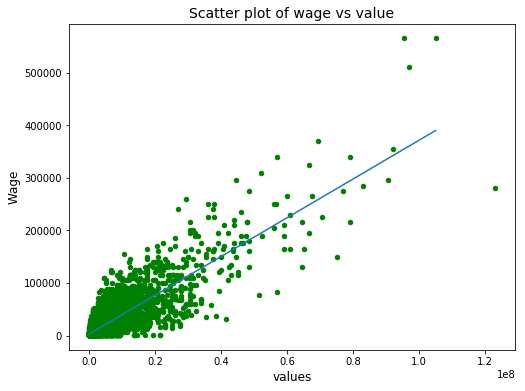

In [89]:
#Ploting the linear regression line

#Scatter Plot 
fifa.plot(kind='scatter', x='Value', y='Wage', color='green', figsize=(8,6))
plt.ylabel('Wage', fontsize=12)
plt.xlabel('values', fontsize=12)
plt.title('Scatter plot of wage vs value',fontsize=14)


#Sorted values of Weight
Value = np.sort(X_train.Value)

#Plotting the sorted values of weight with its fitted value
plt.plot(Value, model.params[0] + model.params[1]*Value)


plt.show()


In [90]:
model.params

const    2799.398621
Value       0.003686
dtype: float64

###  Making Prediction using the Model (on the test data)

In [91]:
X_test = stm.add_constant(X_test)
X_test.head()

,const,Value
2,1.0,123000000.0
3,1.0,97000000.0
10,1.0,52000000.0
13,1.0,67500000.0
19,1.0,79000000.0


In [92]:
#Prediction
#const    2760.708412
#Value       0.003699
#test=2760.708412*0.003699

model.predict(X_test)[:10]

2     456232.986168
3     360385.235955
10    194494.899047
13    251634.903982
19    294029.101192
26    150257.475872
27    179749.091322
28    223986.514498
40    181592.317288
41    181592.317288
dtype: float64

In [94]:
#Storing the predicted values in an array
pred = model.predict(X_test)
pred[:10]

2     456232.986168
3     360385.235955
10    194494.899047
13    251634.903982
19    294029.101192
26    150257.475872
27    179749.091322
28    223986.514498
40    181592.317288
41    181592.317288
dtype: float64

In [95]:
PRED = pd.read_csv("fifa18complete.csv")
pred.head(3)

C:\Users\MANDY\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2     456232.986168
3     360385.235955
10    194494.899047
dtype: float64

In [96]:
train=pd.read_csv('fifa18complete.csv')
train.head(3)

C:\Users\MANDY\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0


In [104]:
pred.to_csv("fifa18complete.csv")
train.to_csv('fifaComplete.csv')

In [99]:
y_test[:10]

2     280000.0
3     510000.0
10    310000.0
13    265000.0
19    215000.0
26    125000.0
27    215000.0
28    265000.0
40    130000.0
41    275000.0
Name: Wage, dtype: float64

## checking accuracy

In [100]:
#Error = actual - predicted
e = y_test - pred
np.mean(e)

-30.202838988606583

In [101]:
#Error^2
import math
e**2

#RMSE = sqrt(sum(e**2)/(ntest-1))
math.sqrt(sum(e**2)/(len(y_test)-2))

12018.98325594412

In [102]:
#RSS = sum of squared error; Note: RMSE = sqrt(RSS/(ntest-2))
rss = np.sum(e**2)
rss

640084352143.041

In [103]:
#Percentage error
(3.8917/np.mean(fifa.Wage))*100

0.03323837867126468

In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

In [37]:
# fitted values (need a constant term for intercept)
model_fitted_y = model.fittedvalues
# model residuals
model_residuals = model.resid
# normalized residuals
model_norm_residuals = model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = model.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = model.get_influence().cooks_distance[0]

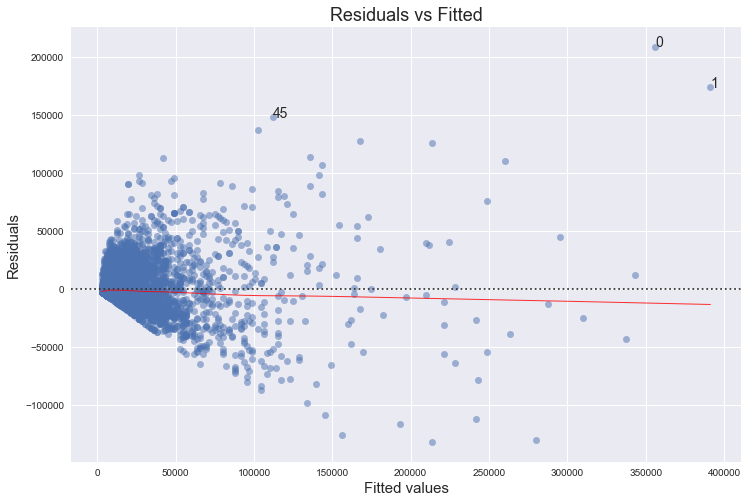

In [38]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)



plot_lm_1.axes[0] = sns.residplot(model_fitted_y, y_train,
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})




plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]
for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));


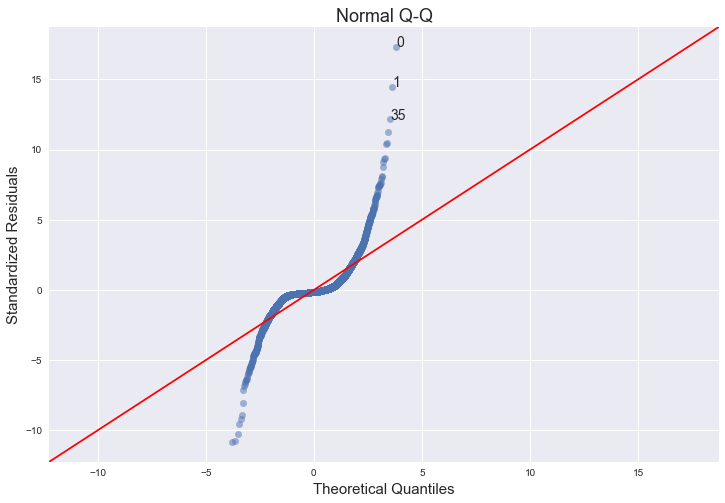

In [39]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

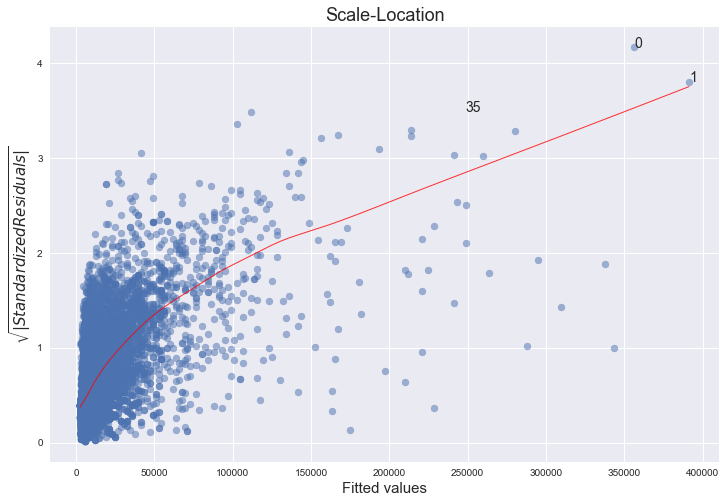

In [40]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');
# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

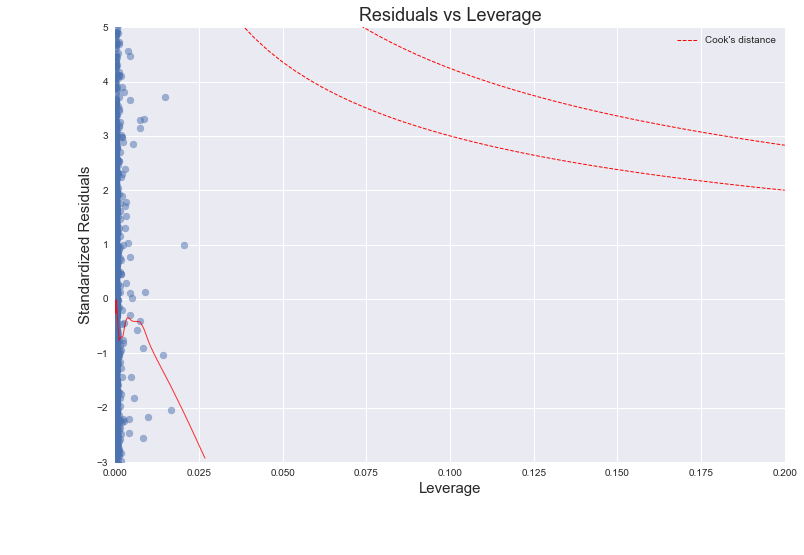

In [41]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')
# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')
p = len(model.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right');